In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)
tf.config.list_physical_devices()
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

C:\Users\gonz3\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


2.9.1


In [2]:
def mae(y_test, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
def mse(y_test, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [4]:
df = pd.get_dummies(df, drop_first=True)

In [5]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [6]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['charges']), df['charges'], test_size=0.33, random_state=42)

In [7]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[8], name='input_layer'),
    tf.keras.layers.Dense(50, name='hidden_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
])

# 2. compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=0.01,
        decay=1e-6,
        momentum=0.9,
        nesterov=True,
        clipvalue=0.5
    ),
    metrics=['mae']
)
# 3. fit the model
model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

In [8]:
y_pred = model.predict(x_test)
mae1 = mae(y_test, y_pred)
mse1 = mse(y_test, y_pred)
mae1, mse1

14/14 [==============================] - 0s 1ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=3666.2488>,
 <tf.Tensor: shape=(), dtype=float32, numpy=40475988.0>)

In [9]:
model.evaluate(x_train, y_train)

28/28 [==============================] - 0s 2ms/step - loss: 3856.7571 - mae: 3856.7571


[3856.757080078125, 3856.757080078125]

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[8], name='input_layer'),
    tf.keras.layers.Dense(50, name='hidden_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
])

# 2. compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=0.01,
        decay=1e-6,
        momentum=0.9,
        nesterov=True,
        clipvalue=0.5
    ),
    metrics=['mae']
)
# 3. fit the model
model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=500, verbose=0)

In [11]:
y_pred = model.predict(x_test)
mae2 = mae(y_test, y_pred)
mse2 = mse(y_test, y_pred)
mae2, mse2

14/14 [==============================] - 0s 3ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=3987.543>,
 <tf.Tensor: shape=(), dtype=float32, numpy=48503556.0>)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[8], name='input_layer'),
    tf.keras.layers.Dense(50, name='hidden_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
])

# 2. compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)
# 3. fit the model
history = model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=500, verbose=0)

In [17]:
y_pred = model.predict(x_test)
mae3 = mae(y_test, y_pred)
mse3 = mse(y_test, y_pred)
mae3, mse3

14/14 [==============================] - 0s 1ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=3272.8357>,
 <tf.Tensor: shape=(), dtype=float32, numpy=44818444.0>)

In [18]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 3272.8357 - mae: 3272.8357


[3272.835693359375, 3272.835693359375]

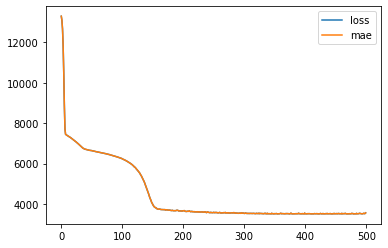

In [20]:
#plot loss
pd.DataFrame(history.history).plot()

### preprocessing tenors

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['charges']), df['charges'], test_size=0.33, random_state=42)

In [50]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(drop='first'), ['sex', 'smoker', 'region'])
)
ct.fit(x_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder', OneHotEncoder(drop='first'),
                                 ['sex', 'smoker', 'region'])])

In [51]:
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[8], name='input_layer'),
    tf.keras.layers.Dense(50, name='hidden_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
])

# 2. compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)
# 3. fit the model
history = model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=500, verbose=0)

In [53]:
y_pred = model.predict(x_test)
mae3 = mae(y_test, y_pred)
mse3 = mse(y_test, y_pred)
mae3, mse3

14/14 [==============================] - 0s 1ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=3234.1543>,
 <tf.Tensor: shape=(), dtype=float32, numpy=44701544.0>)

In [54]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 3234.1543 - mae: 3234.1541


[3234.154296875, 3234.154052734375]